In [24]:
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train = pd.concat([df_train,df_test], sort=True).reset_index(drop=True)

In [26]:
df_train.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
df_train.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [30]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

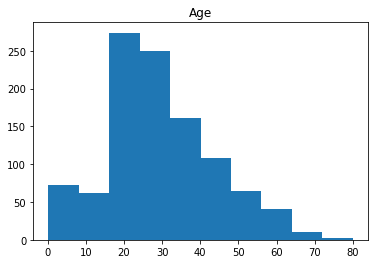

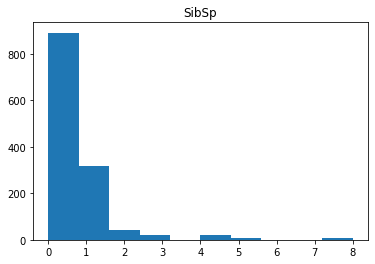

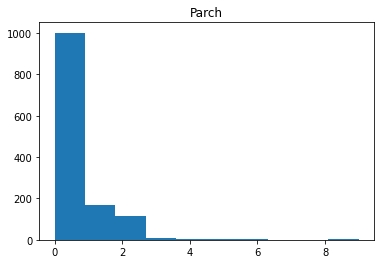

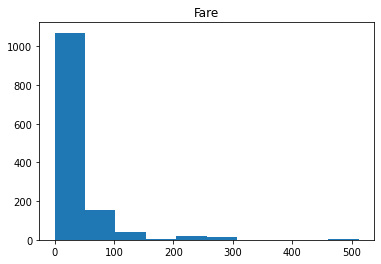

In [33]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

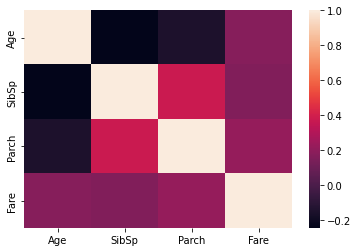

In [34]:
sns.heatmap(df_num.corr())

In [35]:
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



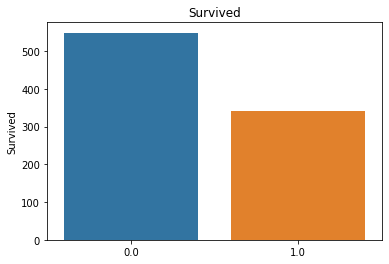

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



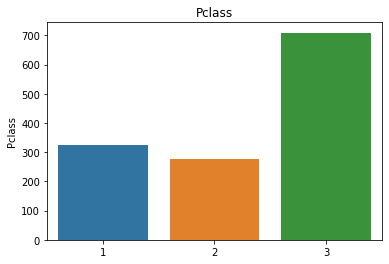

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



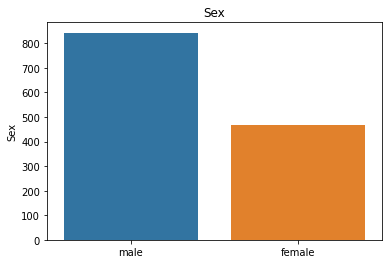

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



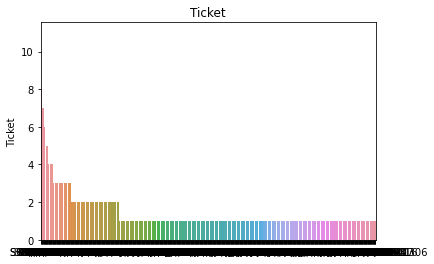

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



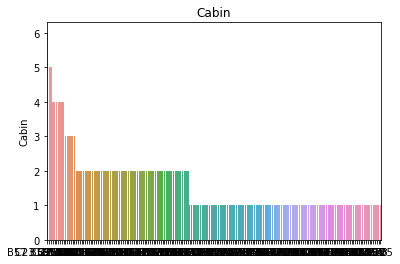

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



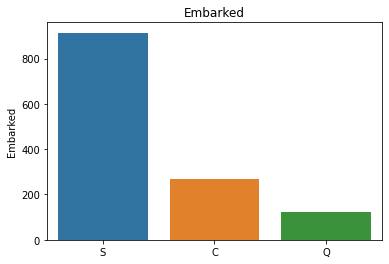

In [36]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [37]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119

Sex       female  male
Survived              
0.0           81   468
1.0          233   109

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


In [38]:
print(pd.pivot_table(df_train.dropna(), index = 'Pclass', columns = 'Age',values = 'Ticket',
                      aggfunc ='count'))

Age     0.92   1.00   2.00   3.00   4.00   6.00   11.00  14.00  15.00  16.00  \
Pclass                                                                         
1         1.0    NaN    1.0    NaN    1.0    NaN    1.0    1.0    1.0    3.0   
2         NaN    1.0    1.0    1.0    1.0    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    1.0    NaN    1.0    1.0    NaN    NaN    NaN    NaN   

Age     ...  58.00  60.00  61.00  62.00  63.00  64.00  65.00  70.00  71.00  \
Pclass  ...                                                                  
1       ...    5.0    2.0    2.0    1.0    1.0    1.0    2.0    1.0    1.0   
2       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Age     80.00  
Pclass         
1         1.0  
2         NaN  
3         NaN  

[3 rows x 63 columns]


In [39]:
import cufflinks as cf
cf.go_offline()

In [40]:
df_train.dropna().pivot(columns='Pclass', values='Age').iplot(kind='box')

In [41]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): # for
        if Pclass == 1:
            return 36 # 36 is avg age as it can be seen in box plot for pasinger in Pclass 1
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [42]:
df_train['Age'] = df_train[['Pclass','Age']].apply(fill_age,axis=1)

In [43]:
df_train.drop('Cabin', axis=1,inplace=True)
df_train.dropna(inplace=True)

In [44]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [45]:
embarked = pd.get_dummies(df_train['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [46]:
parch = pd.get_dummies(df_train['Parch'],drop_first=True)
parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [47]:
df_train = pd.concat([df_train,sex,embarked,parch],axis=1)
df_train

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,male,Q,S,1,2,3,4,5,6
0,3.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,0,1,0,0,0,0,0,0
1,1.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,0,0,0,0,0,0,0,0
2,3.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,0,1,0,0,0,0,0,0
3,1.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,0,1,0,0,0,0,0,0
4,3.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,1,0,1,0,0,0,0,0,0
887,1.0,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,0,0,1,0,0,0,0,0,0
888,3.0,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,0,0,1,0,1,0,0,0,0
889,1.0,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,1,0,0,0,0,0,0,0,0


In [48]:
df_train.drop(['Sex','Embarked','Name','Ticket','Parch'],axis=1,inplace=True)

In [49]:
df_train.head(5)

,Age,Fare,PassengerId,Pclass,SibSp,Survived,male,Q,S,1,2,3,4,5,6
0,3.0,7.2500,1,3,1,0.0,1,0,1,0,0,0,0,0,0
1,1.0,71.2833,2,1,1,1.0,0,0,0,0,0,0,0,0,0
2,3.0,7.9250,3,3,0,1.0,0,0,1,0,0,0,0,0,0
3,1.0,53.1000,4,1,1,1.0,0,0,1,0,0,0,0,0,0
4,3.0,8.0500,5,3,0,0.0,1,0,1,0,0,0,0,0,0


In [50]:
x= df_train.drop('Survived',axis=1)
y= df_train['Survived']

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x,y,cv=5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

[0.80898876 0.78089888 0.76966292 0.78089888 0.8079096 ]
0.7896718085444043


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [53]:
print(cv)

[0.80898876 0.78089888 0.76966292 0.78089888 0.8079096 ]


In [54]:
x= df_train.drop('Survived',axis=1)
y= df_train['Survived']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.47,random_state=69)   

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.47,random_state=69)          

In [57]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [108]:
import pickle
pickle. dump(model, open("model.pkl", "wb"))

In [59]:
pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       268
         1.0       0.78      0.67      0.72       150

    accuracy                           0.81       418
   macro avg       0.80      0.78      0.79       418
weighted avg       0.81      0.81      0.81       418



In [61]:
print("Accuracy Score: ",accuracy_score(y_test,pred))

Accuracy Score:  0.8133971291866029


In [103]:
submission=x_test[['PassengerId']]
submission['Survived']=pred

In [104]:
submission

,PassengerId,Survived
705,706,0.0
724,725,0.0
660,661,0.0
769,770,0.0
20,21,0.0
...,...,...
442,443,0.0
286,287,0.0
570,571,0.0
580,581,1.0


In [ ]:
len(submission)

418

In [ ]:
submission.to_csv('submission.csv',index=False)

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [66]:
embarked = pd.get_dummies(df_test['Embarked'],drop_first=True)
embarked
parch = pd.get_dummies(df_test['Parch'],drop_first=True)
parch
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [67]:
df_test = pd.concat([df_test,sex,embarked,parch],axis=1)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,male,Q,S,1,2,3,4,5,6,9
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,1,0,1,0,0,0,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,0,1,0,0,0,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,1,0,1,0,0,0,0,0,0,0


In [68]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,male,Q,S,1,2,3,4,5,6,9
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,1,0,0,0,0,0,0


In [75]:
df_test.drop(['Cabin'],axis=1,inplace=True)

In [76]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Fare,male,Q,S,1,2,3,4,5,6,9
0,892,3,34.5,0,7.8292,1,1,0,0,0,0,0,0,0,0
1,893,3,47.0,1,7.0000,0,0,1,0,0,0,0,0,0,0
2,894,2,62.0,0,9.6875,1,1,0,0,0,0,0,0,0,0
3,895,3,27.0,0,8.6625,1,0,1,0,0,0,0,0,0,0
4,896,3,22.0,1,12.2875,0,0,1,1,0,0,0,0,0,0


In [80]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Fare            1
male            0
Q               0
S               0
1               0
2               0
3               0
4               0
5               0
6               0
9               0
dtype: int64

In [81]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): # for
        if Pclass == 1:
            return 36 # 36 is avg age as it can be seen in box plot for pasinger in Pclass 1
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [90]:
df_test.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
submission=x_test[['PassengerId']]
submission['Survived']=pred

In [91]:
predicted_test = model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
import pickle.
pickle. dump(model, open("model.pkl", "wb"))

In [95]:
predicted_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [100]:
from operator import index
submission = pd.DataFrame(index = None)


In [101]:
submission['Survived']  = predicted_test

In [102]:
submission

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
412,0.0
413,0.0
414,0.0
415,0.0


In [106]:
submission.to_csv('submissio.csv',index=False)

In [92]:
df_test['Age'] = df_test[['Pclass','Age']].apply(fill_age,axis=1)

In [86]:
df_test.dropna(inplace=True)

In [87]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Fare           0
male           0
Q              0
S              0
1              0
2              0
3              0
4              0
5              0
6              0
9              0
dtype: int64

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Age          417 non-null    float64
 3   SibSp        417 non-null    int64  
 4   Fare         417 non-null    float64
 5   male         417 non-null    uint8  
 6   Q            417 non-null    uint8  
 7   S            417 non-null    uint8  
 8   1            417 non-null    uint8  
 9   2            417 non-null    uint8  
 10  3            417 non-null    uint8  
 11  4            417 non-null    uint8  
 12  5            417 non-null    uint8  
 13  6            417 non-null    uint8  
 14  9            417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 23.6 KB
